In [8]:
import pandas as pd
import seaborn as sns

train_data = pd.read_csv("糖尿病风险预测挑战赛公开数据/train.csv")
test_data = pd.read_csv("糖尿病风险预测挑战赛公开数据/test.csv")

In [9]:
train_data.head(2)

,id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
0,0,0.0,0.0,1.0,18.11946,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,1.88054,0.0,0.0,0.0,6.0,6.0,8.0,0.0
1,1,0.0,1.0,1.0,28.00000,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,2.00000,0.0,0.0,0.0,7.0,6.0,8.0,0.0


In [10]:
test_data.head(2)

,id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,300000,1.0,1.0,1.0,32.000000,0.0,0.0,0.0,1.0,1.000000,...,1.0,0.0,2.000000,15.0,30.000000,0.0,0.0,9.000000,6.0,8.0
1,300001,1.0,1.0,1.0,27.285374,1.0,0.0,0.0,1.0,0.714626,...,1.0,0.0,4.714626,0.0,10.570748,1.0,0.0,12.285374,5.0,5.0


In [11]:
train_data.dtypes

id                        int64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
target                  float64
dtype: object

<Axes: >

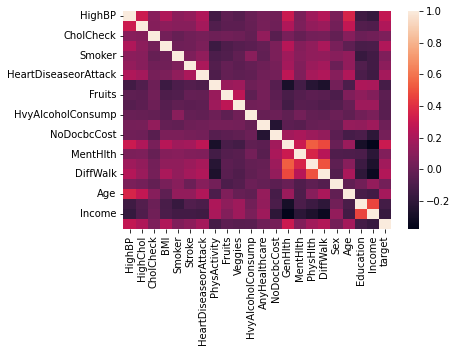

In [15]:
sns.heatmap(train_data.iloc[:, 1:].corr().round(3))

<Axes: >

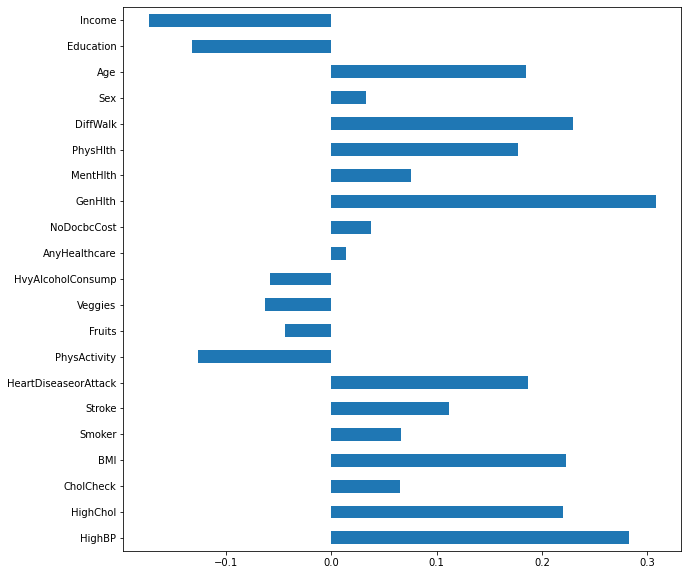

In [18]:
train_data.iloc[:, 1:].corr().target.iloc[:-1].plot(kind='barh', figsize=(10, 10))

In [20]:
from lightgbm import LGBMClassifier

m = LGBMClassifier()
m.fit(
    train_data.drop(["id", "target"], axis=1),
    train_data["target"]
)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.336207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5352
[LightGBM] [Info] Number of data points in the train set: 300000, number of used features: 21
[LightGBM] [Info] Start training from score -0.174353
[LightGBM] [Info] Start training from score -3.912023
[LightGBM] [Info] Start training from score -1.966113


LGBMClassifier()

In [23]:
pd.DataFrame({
    'id': test_data['id'],
    'target': m.predict(test_data.drop(["id"], axis=1))
}).to_csv("submit.csv", index=None)